<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/python%20casos/Caso_07_Prueba_de_autocorrelaci%C3%B3n_de_residuales_en_regresi%C3%B3n_Durbin_Watson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Calcular y contrastar prueba de autocorrelación de *Durbin Watson* para aceptar o rechazar hipóteis nula.

# Marco teórico

La prueba de autocorrelación es una prueba estadística de independidenca que sirve para determinar la correlación entre los residuos de un modelo de regresión lineal.

Si los residuos están correlacionados, se originan problemas cuando se intenta realizar alguna prueba de hipótesis respecto de los coeficientes de regresión.

Se esperaría de manera natural que los residuos no estén correlacionados, esto da lugar a la hipótesis nula y por el contrario los residuos si están correalcionados sería la hipótesis alternativa.

$$
H_0: \text{ Los residuos NO están correlacionados}
$$

$$
H_a: \text{ Los residuos SI están correlacionados}
$$

Para comenzar, es necesario disponer de un un conjunto de datos, por lo menos de dos variables numéricas en donde una se designa como variable independiente o explicativa y la otra variabe dependiente o variable objetivo.

Un diagrama de dispersión representa la relación visual entre dos variables numéricas.

La correlación $r$ tradicionalmente de *Pearson* representa la fuerza de relación entre las dos variables numéricas,con valores $\text{ de -1 a +1 } $.

Se puede hacer un análisis bivariado entre estas dos variables y buscar construir un modelo de regresión lineal simple para realiar predicciones.

La pregunta es: ¿del modelo de regresión lineal simple los residuos están correlacionados?

El modelo de rergesión lineal simple se utiliza comúnmente utilizando la fórmula de mínimos cuadrados.

Un modelo de regresión lineal simple bajo la fórmula de mínimos cuadradao sirve para hacer predicciones de una variable dependiente en relación a una variable independiente o explicativa.

Para el ejemplo que describe más abajo del caso, la variable dependiente o variable objetivo será *ventas*, y la variable independientes será *publicidad*.

La fórmula de mínimos cuadrados para regresión lineal simple:

$$
Y=a+bx+E∴
$$

* Y es la predicción de la variabe dependiente (ventas)
* a es el coeficiente de intersección entre el eje de la abcisa 'y' el valor de x
* b es el valor de la pendiente
* x el nuevo valor de la variable independiente (publicidad) que sirve para predecir la variable dependiente (ventas)
* E = error


Del modelo de regresión lineal, se obtiene la linea de tendencia o linea de predicción que significa las predicciones lineales por cada valor de la variable dependiente 'x'. $Y=a+b\cdot x$.

Ahora de esa línea de tendencia se puede calcular los residuos que es la difrencia entre el valor real de las ventas de las  las observaciones origiales menos las predicciones.

Con estos valores de residuos se puede hacer la prueba de independencia de autocorrelación de residuos bajo el nombre técnico de *Durbin Watson*.

Fórmula para determinar el estadítico d *Durbin-Watson*

$$
d ={\frac{\displaystyle\sum_{t=2}^{n}(e_{t}-e_{t-1})^2}{\displaystyle\sum_{t=1}^{n}(e_{t})^2}}
$$

* $t$ representa el índice de las observaciones desde 1 hasta n.
* $n$ es la cantidad de observaciones de los datos.
* $e_{t}$ son los valores de los residuos del modelo de regresión lineal; la diferencia entre valores reales y valores predichos. $e_t = (y - Y)$
* $e_{t-1}$ representa el valor anterior $e_t$ del registro $t$.
* $(e_{t})^2$, como denomnador es elevar al cuadrado el valor de $e_{t}$.



# Desarrollo

## Cargar librerías

In [ ]:
# Cargar librerías
import statsmodels.api as sm
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
# from scipy.stats import linregress

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from statsmodels.stats.stattools import durbin_watson


## Ejemplo publicidad y ventas

¿La publicidad tiene que ver con las ventas?.

La publicidad como parte de la función mercadotecnia estratégicamente bien conducida y diriga al mercado apropiado es un factor que hace que las ventas tengan buena probabilidad de aumentar para una empresa.


### Construir los datos
* La variable dependiente es ventas.
* La variable independientes es publicidad.
* Las ventas es la cantidad monetaria que hace una empresa en términos de ventas; valores en miles de dólares.
* La publicidad es la cantidad económica que invierte la empresa para generar ventas; valores en miles de dólares.

In [ ]:
publicidad = [55, 55, 53, 55, 54, 53, 55, 57, 59, 62,
              63, 59, 61, 62, 62, 65, 67, 69, 65, 64]
ventas = [153, 156, 153, 147, 159, 160, 147, 147, 152, 160,
          169, 176, 176, 179, 184, 181, 192, 205, 215, 209]
print(ventas)
datos = pd.DataFrame({'publicidad': publicidad, 'ventas': ventas})
datos

[153, 156, 153, 147, 159, 160, 147, 147, 152, 160, 169, 176, 176, 179, 184, 181, 192, 205, 215, 209]


,publicidad,ventas
0,55,153
1,55,156
2,53,153
3,55,147
4,54,159
5,53,160
6,55,147
7,57,147
8,59,152
9,62,160


### Diagrama de dispersión de los datos

Solo se representa el diagrama de dispersión



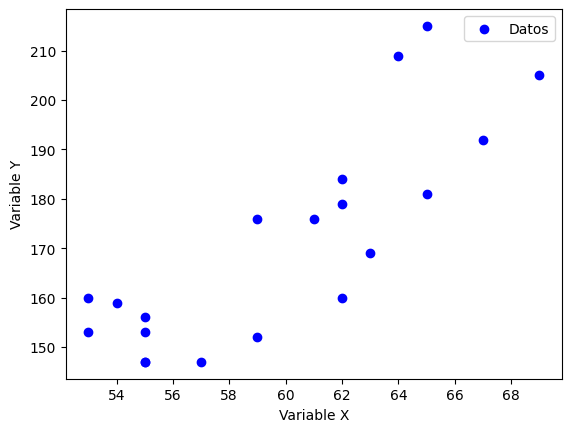

In [ ]:
# Crea el gráfico de dispersión con la línea de regresión
plt.scatter(publicidad, ventas, label='Datos', color='blue')

# Etiquetas y leyenda
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.legend()

# Muestra el gráfico
plt.show()

### La correlación de Pearson

* =1 Correlación totalmente positiva.
* +0.8 Correlación positiva fuerte.
* +0.6 Correlación positiva moderada.
* 0 No hay correlación entre las variables.
* -0.6 Correlación negativa moderada.
* -0.8 Correlación negativa fuerte
* -1 Correlación totalmente negativa

In [ ]:
r = np.corrcoef(np.array(publicidad), np.array(ventas))
print ("Correlación de Pearson \n", r)
print ("Se observa una correlación positiva fuerte entre las dos variables")

Correlación de Pearson 
 [[1.         0.82764806]
 [0.82764806 1.        ]]
Se observa una correlación positiva fuerte entre las dos variables


In [ ]:
# o bien
r = stats.pearsonr(publicidad, ventas)

# Imprimir el coeficiente de correlación de Pearson
print("Correlación de Pearson:", r[0])
print ("Deben ser el mismo valor")


Correlación de Pearson: 0.8276480622919316
Deben ser el mismo valor


### Contruir un modelo de regresión lineal




In [ ]:
publicidad = np.array(publicidad).reshape(-1, 1)
ventas = np.array(ventas)

modelo = LinearRegression()
modelo.fit(publicidad, ventas) # Contiene estadísticos del modelo

# Valores de coeficientes a y b de la fórmua...
a = modelo.intercept_
b = modelo.coef_

print("Valor de a: ", a)
print("Valor de b: ", b)

Valor de a:  -43.80238224147263
Valor de b:  [3.59501895]


Significa que la predicción estará dada por:
$$
Y = -43.8023 + 3.5950 \cdot x
$$

Si $x = 50$ la predicción $Y$ sería:
$$
Y = -43.8023 + 3.5950 \cdot 50 \approx 135.94
$$

### Visualizar linea de tendencia del modelo

La línea de tendencia son las predicciones por cada valor de la variable independiente publicidad.



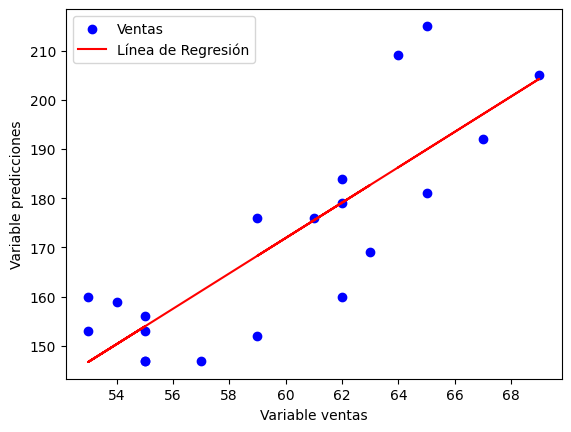

Coeficiente de la pendiente (b): [3.59501895]
Coeficiente de la intersección : -43.80238224147263
Coeficiente de correlación (r): 0.8276480622919316


In [ ]:
# las predicciones es la linea de tendencia
# Realizar predicciones
predicciones = modelo.predict(publicidad)


# Crea el gráfico de dispersión con la línea de regresión
plt.scatter(publicidad, ventas, label='Ventas', color='blue')
plt.plot(publicidad, predicciones, label='Línea de Regresión', color='red')

# Etiquetas y leyenda
plt.xlabel('Variable ventas')
plt.ylabel('Variable predicciones')
plt.legend()

# Muestra el gráfico
plt.show()

# Imprime los resultados de la regresión
print(f"Coeficiente de la pendiente (b): {b}")
print(f"Coeficiente de la intersección : {a}")
print(f"Coeficiente de correlación (r): {r[0]}")
# print(f"Error estándar: {std_err}")

### Los residuos

Los residuos representan la diferencia entre los valores reales menos las predicciones $residuos = ventas - predicciones$.



In [ ]:
# Calcular los residuos
residuos = ventas - predicciones

print("Residuos:")
print(residuos)

Residuos:
[ -0.92365999   2.07634001   6.26637791  -6.92365999   8.67135896
  13.26637791  -6.92365999 -14.11369789 -16.30373579 -19.08879264
 -13.68381159   7.69626421   0.50622631  -0.08879264   4.91120736
  -8.87384949  -5.06388738   0.74607472  25.12615051  22.72116946]


A partir de estos valores de residuos se inicia la prueba de independencia de correlación de los residuos de una regresión lineal.

Visualmente los residuos




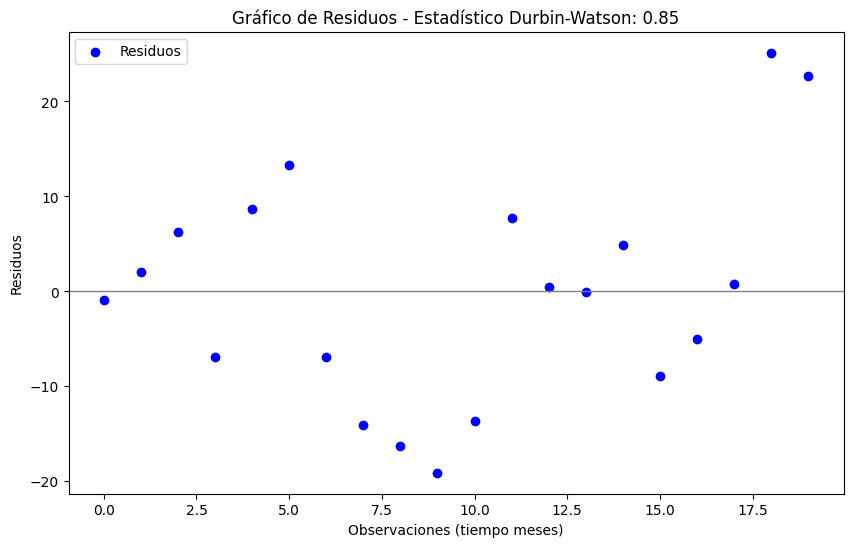

Residuos:
[ -0.92365999   2.07634001   6.26637791  -6.92365999   8.67135896
  13.26637791  -6.92365999 -14.11369789 -16.30373579 -19.08879264
 -13.68381159   7.69626421   0.50622631  -0.08879264   4.91120736
  -8.87384949  -5.06388738   0.74607472  25.12615051  22.72116946]


In [ ]:
# Calcula el estadístico de Durbin-Watson
d = durbin_watson(residuos)

# Crea una secuencia de números para representar el tiempo (índice de datos)
tiempo = np.arange(len(residuos))

# Crea un gráfico de dispersión de los residuos
plt.figure(figsize=(10, 6))
plt.scatter(tiempo, residuos, label='Residuos', color='blue')

# Dibuja líneas horizontales en +/- 2 para indicar los límites de autocorrelación
# plt.axhline(y=2, color='red', linestyle='--', label='Límite superior (Autocorrelación negativa)')
# plt.axhline(y=-2, color='green', linestyle='--', label='Límite inferior (Autocorrelación positiva)')

# Añade una línea horizontal en y=0 para referencia
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1)

# Etiquetas y leyenda
plt.xlabel('Observaciones (tiempo meses)')
plt.ylabel('Residuos')
plt.title(f'Gráfico de Residuos - Estadístico Durbin-Watson: {d:.2f}')
plt.legend()

# Muestra el gráfico
plt.show()
print("Residuos:")
print(residuos)

### Cálculo manual del valor de prueba d *Durbin-Watson*

In [ ]:
n = len(ventas)
obs = list(range(1, n+1))

#print(residuos)
# Construir la columna de residuos anteriroes (t-1)
residuos_anteriores = []
# Iteramos a través de los residuos y construimos los residuos anteriores.
for i in range(len(residuos)):
  if i == 0:
    # El primer residuo no tiene un residuo anterior.
    residuo_anterior = None
  else:
    # Para los residuos subsiguientes, tomamos el residuo anterior.
    residuo_anterior = residuos[i - 1]
    # Agregamos el residuo anterior a la lista.
  residuos_anteriores.append(residuo_anterior)


# Contruir la tabla para obtener d
tabla = pd.DataFrame({'obs': obs, 'ventas': ventas, 'pred':predicciones, 'res_e': residuos, 'res_ant_e':residuos_anteriores})
tabla['(res-res_ant_e)_cuad'] = (tabla['res_e'] - tabla['res_ant_e']) ** 2
tabla['res_e_cuad'] = tabla['res_e'] ** 2

print(tabla)


# El denominador de la fórmula para d
numerador = np.sum(tabla['(res-res_ant_e)_cuad'])
# El denominador para la fórmula para calcular
denominador = np.sum(tabla['res_e_cuad'])

d = np.round(numerador/denominador, 6)
print("Dividir ", numerador, "/", denominador,"=", d)
print("Debe ser un valor similar al obtenido anteriormente")

    obs  ventas        pred      res_e  res_ant_e  (res-res_ant_e)_cuad  \
0     1     153  153.923660  -0.923660        NaN                   NaN   
1     2     156  153.923660   2.076340  -0.923660              9.000000   
2     3     153  146.733622   6.266378   2.076340             17.556418   
3     4     147  153.923660  -6.923660   6.266378            173.977100   
4     5     159  150.328641   8.671359  -6.923660            243.204616   
5     6     160  146.733622  13.266378   8.671359             21.114199   
6     7     147  153.923660  -6.923660  13.266378            407.637630   
7     8     147  161.113698 -14.113698  -6.923660             51.696645   
8     9     152  168.303736 -16.303736 -14.113698              4.796266   
9    10     160  179.088793 -19.088793 -16.303736              7.756542   
10   11     169  182.683812 -13.683812 -19.088793             29.213820   
11   12     176  168.303736   7.696264 -13.683812            457.107641   
12   13     176  175.4937

### Significado del estadístico de prueba 'd' de *Durbin-Watson*

* ¿Qué significa el valor del estadístico de prueba $d = 0.085$  *Durbin-Watson* y,

* ¿cómo se utiliza para contraste?

* ¿contra qué se contrasta para aceptar o rechazar una hipótesis nula?

* Definir hipótesis nula $H_0$ e hipótesis alternativa $H_a$:

$$
H_0: \text{ Los residuos NO están correlacionados}
$$

$$
H_a: \text{ Los residuos SI están correlacionados}
$$

* Definir nivel de confianza y valor de alfa:
$$
confianza = 0.95;
alfa = (1 - confianza) = 0.05
$$

* Criterio para contraste:

Consultando tabla para determinar los límites críticos para ontrastar una prueba d de Derbin Watson se necesita:
* valor de n=20 número de observaciones.
* valor k = 1; k es una variable independiene o explicativa, en este ejercicio 'publicidad'.
* Valor del alfa a 0.05 comúnmente

Entonces se obtiene unos límites
* di = 1.20; límite inferior
* ds = 1.41; límite superior

¿Cómo hay que contrastar d con estos límites?

$$
si (d < di): \text{rechazar Ho}
$$

$$
si (di < d < ds): \text{zona de indiferencia; dudoso}
$$

$$
si (d > ds): \text{aceptar Ho}
$$

Enlace para tabla *Durbin-Watson*: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ugr.es/~romansg/material/WebEco/01-comunes/dw.pdf




In [ ]:
# Valores obtenidos de tabla al 0.05 alfa; n=20 y k = 1
di = 1.20
ds = 1.41

# Hipótesis
H0 = "No hay correlación entre los residuos"
Ha = "Si hay correlación entre los residuos"

if (d < di):
  decision = "se rechaza Ho; " + Ha
elif (di <= d and d <= ds):  # Corregir esta condición
  decision = "zona de indiferencia; dudoso"
elif (d > ds):
  decision = "se acepta H0; " + H0

print(decision)

se rechaza Ho; Si hay correlación entre los residuos


# Interpretación

Un valor estadístico "d" en una prueba de Durbin-Watson se utiliza para evaluar la autocorrelación de los residuos en un modelo de regresión.

En una prueba de Durbin-Watson, el valor "d" se compara con valores críticos para determinar si los residuos muestran autocorrelación positiva, negativa o si no hay autocorrelación.

Si el valor "d" es cercano a 2 (generalmente en el rango de 1.5 a 2.5), esto sugiere que no hay evidencia de autocorrelación. En otras palabras, los residuos no muestran un patrón sistemático de correlación.

Si el valor "d" es significativamente menor que 2 (por ejemplo, 1.20), esto sugiere que hay autocorrelación positiva en los residuos. Los residuos adyacentes están correlacionados positivamente.

Si el valor "d" es significativamente mayor que 2 (por ejemplo, 2.80), esto sugiere que hay autocorrelación negativa en los residuos. Los residuos adyacentes están correlacionados negativamente.

Para el caso, con un valor "d" de 0.85, se sugiere que hay autocorrelación positiva en los residuos. Esto significa que los residuos adyacentes están correlacionados positivamente, lo que podría indicar que el modelo de regresión no captura completamente la estructura de los datos o que hay información sistemática que no se ha tenido en cuenta.

En este escenario, se rechaza la hipótesis nula (Ho) de que no hay autocorrelación en los residuos.

